In [2]:
import pymongo

##### Run this command to start mongodb service: sudo systemctl start mongod

In [3]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

## Create a database

In [4]:
mydb = myclient["mydatabase"]

In [5]:
mydb

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'mydatabase')

In [6]:
# Listing all databases
print(myclient.list_database_names())

['admin', 'config', 'local']


## Create Collection - Create Table

In [7]:
mycol = mydb["customers"]

In [8]:
print(mydb.list_collection_names())

[]


## Insertion

In [67]:
# Insert one document
mydict = { "name": "John", "address": "Highway 37" }

x = mycol.insert_one(mydict)

In [68]:
print(x.inserted_id)

603b31a01ee1a5016a328edc


In [79]:
# Print List of Collections/Tables
print(mydb.list_collection_names())
print(myclient.list_database_names())

['customers']
['admin', 'config', 'local', 'mydatabase']


In [80]:
# Insert multiple documents
mylist = [
  { "name": "Amy", "address": "Apple st 652"},
  { "name": "Hannah", "address": "Mountain 21"},
  { "name": "Michael", "address": "Valley 345"},
  { "name": "Sandy", "address": "Ocean blvd 2"},
  { "name": "Betty", "address": "Green Grass 1"},
  { "name": "Richard", "address": "Sky st 331"},
  { "name": "Susan", "address": "One way 98"},
  { "name": "Vicky", "address": "Yellow Garden 2"},
  { "name": "Ben", "address": "Park Lane 38"},
  { "name": "William", "address": "Central st 954"},
  { "name": "Chuck", "address": "Main Road 989"},
  { "name": "Viola", "address": "Sideway 1633"}
]

x = mycol.insert_many(mylist)

In [81]:
#print list of the _id values of the inserted documents:
print(x.inserted_ids)

[ObjectId('603b33091ee1a5016a328ee9'), ObjectId('603b33091ee1a5016a328eea'), ObjectId('603b33091ee1a5016a328eeb'), ObjectId('603b33091ee1a5016a328eec'), ObjectId('603b33091ee1a5016a328eed'), ObjectId('603b33091ee1a5016a328eee'), ObjectId('603b33091ee1a5016a328eef'), ObjectId('603b33091ee1a5016a328ef0'), ObjectId('603b33091ee1a5016a328ef1'), ObjectId('603b33091ee1a5016a328ef2'), ObjectId('603b33091ee1a5016a328ef3'), ObjectId('603b33091ee1a5016a328ef4')]


In [72]:
# Number of documents in a collection
mycol.estimated_document_count()

13

In [73]:
# Insert multiple documents with custom IDs.

mylist = [
  { "_id": 1, "name": "John", "address": "Highway 37"},
  { "_id": 2, "name": "Peter", "address": "Lowstreet 27"},
  { "_id": 3, "name": "Amy", "address": "Apple st 652"},
  { "_id": 4, "name": "Hannah", "address": "Mountain 21"},
  { "_id": 5, "name": "Michael", "address": "Valley 345"},
  { "_id": 6, "name": "Sandy", "address": "Ocean blvd 2"},
  { "_id": 7, "name": "Betty", "address": "Green Grass 1"},
  { "_id": 8, "name": "Richard", "address": "Sky st 331"},
  { "_id": 9, "name": "Susan", "address": "One way 98"},
  { "_id": 10, "name": "Vicky", "address": "Yellow Garden 2"},
  { "_id": 11, "name": "Ben", "address": "Park Lane 38"},
  { "_id": 12, "name": "William", "address": "Central st 954"},
  { "_id": 13, "name": "Chuck", "address": "Main Road 989"},
  { "_id": 14, "name": "Viola", "address": "Sideway 1633"}
]

x = mycol.insert_many(mylist)

In [74]:
#print list of the _id values of the inserted documents:
print(x.inserted_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


## Retrieve Data/Documents

In [36]:
# The find_one() method returns the first occurrence in the selection.
x = mycol.find_one()
print(x)

{'_id': ObjectId('603a83611ee1a5016a328ecf'), 'name': 'John', 'address': 'Highway 37'}


In [38]:
x = mycol.find({})
[row for row in x]

[{'_id': ObjectId('603a83611ee1a5016a328ecf'),
  'name': 'John',
  'address': 'Highway 37'},
 {'_id': ObjectId('603a83621ee1a5016a328ed0'),
  'name': 'Amy',
  'address': 'Apple st 652'},
 {'_id': ObjectId('603a83621ee1a5016a328ed1'),
  'name': 'Hannah',
  'address': 'Mountain 21'},
 {'_id': ObjectId('603a83621ee1a5016a328ed2'),
  'name': 'Michael',
  'address': 'Valley 345'},
 {'_id': ObjectId('603a83621ee1a5016a328ed3'),
  'name': 'Sandy',
  'address': 'Ocean blvd 2'},
 {'_id': ObjectId('603a83621ee1a5016a328ed4'),
  'name': 'Betty',
  'address': 'Green Grass 1'},
 {'_id': ObjectId('603a83621ee1a5016a328ed5'),
  'name': 'Richard',
  'address': 'Sky st 331'},
 {'_id': ObjectId('603a83621ee1a5016a328ed6'),
  'name': 'Susan',
  'address': 'One way 98'},
 {'_id': ObjectId('603a83621ee1a5016a328ed7'),
  'name': 'Vicky',
  'address': 'Yellow Garden 2'},
 {'_id': ObjectId('603a83621ee1a5016a328ed8'),
  'name': 'Ben',
  'address': 'Park Lane 38'},
 {'_id': ObjectId('603a83621ee1a5016a328ed9')

In [82]:
# Include certain number of columns

x = mycol.find({},{ "_id": 0, "name": 1, "address": 1 })
[row for row in x]

[{'name': 'John', 'address': 'Highway 37'},
 {'name': 'Amy', 'address': 'Apple st 652'},
 {'name': 'Hannah', 'address': 'Mountain 21'},
 {'name': 'Michael', 'address': 'Canyon 123'},
 {'name': 'Sandy', 'address': 'Ocean blvd 2'},
 {'name': 'Betty', 'address': 'Green Grass 1'},
 {'name': 'Minnie', 'address': 'Sky st 331'},
 {'name': 'Susan', 'address': 'One way 98'},
 {'name': 'Vicky', 'address': 'Yellow Garden 2'},
 {'name': 'Ben', 'address': 'Park Lane 38'},
 {'name': 'William', 'address': 'Central st 954'},
 {'name': 'Chuck', 'address': 'Main Road 989'},
 {'name': 'Minnie', 'address': 'Sideway 1633'},
 {'name': 'John', 'address': 'Highway 37'},
 {'name': 'Peter', 'address': 'Lowstreet 27'},
 {'name': 'Amy', 'address': 'Apple st 652'},
 {'name': 'Hannah', 'address': 'Mountain 21'},
 {'name': 'Michael', 'address': 'Valley 345'},
 {'name': 'Sandy', 'address': 'Ocean blvd 2'},
 {'name': 'Betty', 'address': 'Green Grass 1'},
 {'name': 'Minnie', 'address': 'Sky st 331'},
 {'name': 'Susan',

In [83]:
# This will exclude only address
for x in mycol.find({},{ "address": 0 }):
  print(x)

{'_id': ObjectId('603b31a01ee1a5016a328edc'), 'name': 'John'}
{'_id': ObjectId('603b31a61ee1a5016a328edd'), 'name': 'Amy'}
{'_id': ObjectId('603b31a61ee1a5016a328ede'), 'name': 'Hannah'}
{'_id': ObjectId('603b31a61ee1a5016a328edf'), 'name': 'Michael'}
{'_id': ObjectId('603b31a61ee1a5016a328ee0'), 'name': 'Sandy'}
{'_id': ObjectId('603b31a61ee1a5016a328ee1'), 'name': 'Betty'}
{'_id': ObjectId('603b31a61ee1a5016a328ee2'), 'name': 'Minnie'}
{'_id': ObjectId('603b31a61ee1a5016a328ee3'), 'name': 'Susan'}
{'_id': ObjectId('603b31a61ee1a5016a328ee4'), 'name': 'Vicky'}
{'_id': ObjectId('603b31a61ee1a5016a328ee5'), 'name': 'Ben'}
{'_id': ObjectId('603b31a61ee1a5016a328ee6'), 'name': 'William'}
{'_id': ObjectId('603b31a61ee1a5016a328ee7'), 'name': 'Chuck'}
{'_id': ObjectId('603b31a61ee1a5016a328ee8'), 'name': 'Minnie'}
{'_id': 1, 'name': 'John'}
{'_id': 2, 'name': 'Peter'}
{'_id': 3, 'name': 'Amy'}
{'_id': 4, 'name': 'Hannah'}
{'_id': 5, 'name': 'Michael'}
{'_id': 6, 'name': 'Sandy'}
{'_id': 7, 

### You get an error if you specify both 0 and 1 values in the same object (except if one of the fields is the _id field):

### Find documents on the base of conditions/queries

In [45]:
# Find document(s) with the address "Park Lane 38"
myquery = { "address": "Park Lane 38" }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('603a83621ee1a5016a328ed8'), 'name': 'Ben', 'address': 'Park Lane 38'}
{'_id': 11, 'name': 'Ben', 'address': 'Park Lane 38'}


In [47]:
# Find documents where the address starts with the letter "S" or higher
myquery = { "address": { "$gt": "S" } }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('603a83621ee1a5016a328ed2'), 'name': 'Michael', 'address': 'Valley 345'}
{'_id': ObjectId('603a83621ee1a5016a328ed5'), 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': ObjectId('603a83621ee1a5016a328ed7'), 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': ObjectId('603a83621ee1a5016a328edb'), 'name': 'Viola', 'address': 'Sideway 1633'}
{'_id': 5, 'name': 'Michael', 'address': 'Valley 345'}
{'_id': 8, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 10, 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}


In [48]:
# Query using Regular Expression
myquery = { "address": { "$regex": "^S" } }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('603a83621ee1a5016a328ed5'), 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': ObjectId('603a83621ee1a5016a328edb'), 'name': 'Viola', 'address': 'Sideway 1633'}
{'_id': 8, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}


## Sort Results

In [49]:
# Sort by ascending order
mydoc = mycol.find().sort("name")

for x in mydoc:
  print(x)

{'_id': ObjectId('603a83621ee1a5016a328ed0'), 'name': 'Amy', 'address': 'Apple st 652'}
{'_id': 3, 'name': 'Amy', 'address': 'Apple st 652'}
{'_id': ObjectId('603a83621ee1a5016a328ed8'), 'name': 'Ben', 'address': 'Park Lane 38'}
{'_id': 11, 'name': 'Ben', 'address': 'Park Lane 38'}
{'_id': ObjectId('603a83621ee1a5016a328ed4'), 'name': 'Betty', 'address': 'Green Grass 1'}
{'_id': 7, 'name': 'Betty', 'address': 'Green Grass 1'}
{'_id': ObjectId('603a83621ee1a5016a328eda'), 'name': 'Chuck', 'address': 'Main Road 989'}
{'_id': 13, 'name': 'Chuck', 'address': 'Main Road 989'}
{'_id': ObjectId('603a83621ee1a5016a328ed1'), 'name': 'Hannah', 'address': 'Mountain 21'}
{'_id': 4, 'name': 'Hannah', 'address': 'Mountain 21'}
{'_id': ObjectId('603a83611ee1a5016a328ecf'), 'name': 'John', 'address': 'Highway 37'}
{'_id': 1, 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('603a83621ee1a5016a328ed2'), 'name': 'Michael', 'address': 'Valley 345'}
{'_id': 5, 'name': 'Michael', 'address': 'Valley

### sort("name", 1) #ascending
### sort("name", -1) #descending

In [50]:
mydoc = mycol.find().sort("name", -1)

for x in mydoc:
  print(x)

{'_id': ObjectId('603a83621ee1a5016a328ed9'), 'name': 'William', 'address': 'Central st 954'}
{'_id': 12, 'name': 'William', 'address': 'Central st 954'}
{'_id': ObjectId('603a83621ee1a5016a328edb'), 'name': 'Viola', 'address': 'Sideway 1633'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}
{'_id': ObjectId('603a83621ee1a5016a328ed7'), 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': 10, 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': ObjectId('603a83621ee1a5016a328ed6'), 'name': 'Susan', 'address': 'One way 98'}
{'_id': 9, 'name': 'Susan', 'address': 'One way 98'}
{'_id': ObjectId('603a83621ee1a5016a328ed3'), 'name': 'Sandy', 'address': 'Ocean blvd 2'}
{'_id': 6, 'name': 'Sandy', 'address': 'Ocean blvd 2'}
{'_id': ObjectId('603a83621ee1a5016a328ed5'), 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 8, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 2, 'name': 'Peter', 'address': 'Lowstreet 27'}
{'_id': ObjectId('603a83621ee1a5016a328ed2'), 'name': 'Michael

## Delete documents

In [54]:
# Delete the document with the address "Mountain 21"

myquery = { "address": "Apple st 652" }

mycol.delete_one(myquery)

In [60]:
# Delete all documents were the address starts with the letter S
myquery = { "address": {"$regex": "^S"} }

x = mycol.delete_many(myquery)

print(x.deleted_count, " documents deleted.")

4  documents deleted.


In [63]:
# Delete all documents in a collection

x = mycol.delete_many({})

print(x.deleted_count, " documents deleted.")

21  documents deleted.


## Delete Collection

In [84]:
# Delete a collection
mycol.drop()

## Update Collection

In [75]:
# I update_one, If the query finds more than one record, only the first occurrence is updated.
myquery = { "address": "Valley 345" }
newvalues = { "$set": { "address": "Canyon 123" } }

mycol.update_one(myquery, newvalues)

#print "customers" after the update:
for x in mycol.find():
  print(x)

{'_id': ObjectId('603b31a01ee1a5016a328edc'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('603b31a61ee1a5016a328edd'), 'name': 'Amy', 'address': 'Apple st 652'}
{'_id': ObjectId('603b31a61ee1a5016a328ede'), 'name': 'Hannah', 'address': 'Mountain 21'}
{'_id': ObjectId('603b31a61ee1a5016a328edf'), 'name': 'Michael', 'address': 'Canyon 123'}
{'_id': ObjectId('603b31a61ee1a5016a328ee0'), 'name': 'Sandy', 'address': 'Ocean blvd 2'}
{'_id': ObjectId('603b31a61ee1a5016a328ee1'), 'name': 'Betty', 'address': 'Green Grass 1'}
{'_id': ObjectId('603b31a61ee1a5016a328ee2'), 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': ObjectId('603b31a61ee1a5016a328ee3'), 'name': 'Susan', 'address': 'One way 98'}
{'_id': ObjectId('603b31a61ee1a5016a328ee4'), 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': ObjectId('603b31a61ee1a5016a328ee5'), 'name': 'Ben', 'address': 'Park Lane 38'}
{'_id': ObjectId('603b31a61ee1a5016a328ee6'), 'name': 'William', 'address': 'Central st 954'}
{'_id': Obj

In [76]:
# To update all documents that meets the criteria of the query, use the update_many() method.
# Update all documents where the address starts with the letter "S"

myquery = { "address": { "$regex": "^S" } }
newvalues = { "$set": { "name": "Minnie" } }

x = mycol.update_many(myquery, newvalues)

print(x.modified_count, "documents updated.")

4 documents updated.


## Limit() Records/Documents

In [78]:
# The limit() method takes one parameter, a number defining how many documents to return.
myresult = mycol.find().limit(5)

#print the result:
for x in myresult:
  print(x)

{'_id': ObjectId('603b31a01ee1a5016a328edc'), 'name': 'John', 'address': 'Highway 37'}
{'_id': ObjectId('603b31a61ee1a5016a328edd'), 'name': 'Amy', 'address': 'Apple st 652'}
{'_id': ObjectId('603b31a61ee1a5016a328ede'), 'name': 'Hannah', 'address': 'Mountain 21'}
{'_id': ObjectId('603b31a61ee1a5016a328edf'), 'name': 'Michael', 'address': 'Canyon 123'}
{'_id': ObjectId('603b31a61ee1a5016a328ee0'), 'name': 'Sandy', 'address': 'Ocean blvd 2'}


## Aggregation

#### Syntax

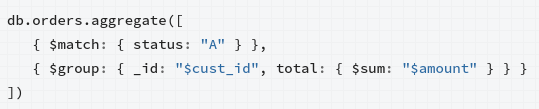

In [110]:
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

In [111]:
# Insert multiple documents with custom IDs.

mylist = [
  { "_id": 1, "name": "John", "address": "Highway 37", "rating": "A"},
  { "_id": 2, "name": "Peter", "address": "Lowstreet 27", "rating": "B"},
  { "_id": 3, "name": "Amy", "address": "Apple st 652", "rating": "C"},
  { "_id": 4, "name": "Hannah", "address": "Mountain 21", "rating": "A"},
  { "_id": 5, "name": "Michael", "address": "Valley 345", "rating": "B"},
  { "_id": 6, "name": "Sandy", "address": "Ocean blvd 2", "rating": "C"},
  { "_id": 7, "name": "Betty", "address": "Green Grass 1", "rating": "A"},
  { "_id": 8, "name": "Richard", "address": "Sky st 331", "rating": "A"},
  { "_id": 9, "name": "Susan", "address": "One way 98", "rating": "B"},
  { "_id": 10, "name": "Vicky", "address": "Yellow Garden 2", "rating": "C"},
  { "_id": 11, "name": "Ben", "address": "Park Lane 38", "rating": "A"},
  { "_id": 12, "name": "William", "address": "Central st 954", "rating": "B"},
  { "_id": 13, "name": "Chuck", "address": "Main Road 989", "rating": "C"},
  { "_id": 14, "name": "Viola", "address": "Sideway 1633", "rating": "D"}
]

x = mycol.insert_many(mylist)

In [112]:
[i for i in mycol.find({})]

[{'_id': 1, 'name': 'John', 'address': 'Highway 37', 'rating': 'A'},
 {'_id': 2, 'name': 'Peter', 'address': 'Lowstreet 27', 'rating': 'B'},
 {'_id': 3, 'name': 'Amy', 'address': 'Apple st 652', 'rating': 'C'},
 {'_id': 4, 'name': 'Hannah', 'address': 'Mountain 21', 'rating': 'A'},
 {'_id': 5, 'name': 'Michael', 'address': 'Valley 345', 'rating': 'B'},
 {'_id': 6, 'name': 'Sandy', 'address': 'Ocean blvd 2', 'rating': 'C'},
 {'_id': 7, 'name': 'Betty', 'address': 'Green Grass 1', 'rating': 'A'},
 {'_id': 8, 'name': 'Richard', 'address': 'Sky st 331', 'rating': 'A'},
 {'_id': 9, 'name': 'Susan', 'address': 'One way 98', 'rating': 'B'},
 {'_id': 10, 'name': 'Vicky', 'address': 'Yellow Garden 2', 'rating': 'C'},
 {'_id': 11, 'name': 'Ben', 'address': 'Park Lane 38', 'rating': 'A'},
 {'_id': 12, 'name': 'William', 'address': 'Central st 954', 'rating': 'B'},
 {'_id': 13, 'name': 'Chuck', 'address': 'Main Road 989', 'rating': 'C'},
 {'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633', 'ra

In [128]:
pipeline = [
    # first stage
    { '$group':
        {'_id': "$rating",
         "count" : { '$sum' :1 }
        }
    },
    # second stage
    {"$sort":  
         {"_id":-1}
    }
]

In [129]:
results = mycol.aggregate(pipeline)

In [130]:
for result in results:
    print(result, end=",")

{'_id': 'D', 'count': 1},{'_id': 'C', 'count': 4},{'_id': 'B', 'count': 4},{'_id': 'A', 'count': 5},

## Save Images in base64 format

#### As long as the document doesn't exceed 16MB standard bson is fine, otherwise gridfs should be used.

In [16]:
from PIL import Image
from bson.objectid import ObjectId
import io
from matplotlib import pyplot as plt

In [134]:
im = Image.open("image.jpg")

image_bytes = io.BytesIO()
im.save(image_bytes, format='JPEG')

image = {
    'data': image_bytes.getvalue()
}

In [135]:
mycol.insert_one(image)

In [17]:
#ObjectId('603b662d1ee1a5016a328f03')
x = [i for i in mycol.find({"_id": ObjectId("603b662d1ee1a5016a328f03")})]
r_image = x[0]['data']

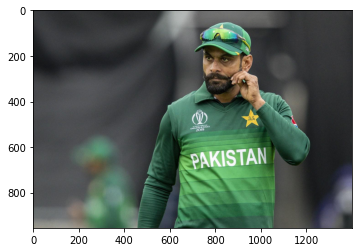

In [18]:
pil_img = Image.open(io.BytesIO(r_image))
plt.imshow(pil_img)
plt.show()